<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Simple_2D_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import autograd.numpy as np
from autograd import grad

In [2]:
def f(x):
  return (x-50)**2

In [4]:
# generate data
import random
X = []
Y = []
label = []
for i in range(400):
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  else:
    Y.append(0)

In [11]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

def train_step(A, k):
  global X,Y, accuracy

  r = int(len(X)*0.9)
  #kunoukoukeduziheisright?kunduzikun zhe gee shi qu 0.8 meiciyifong 0.1?xkou hmiande 0.2 kunkouke zheyag gaicheng 0.9 zhihou yiranconverge 
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  # TruePositives = 0
  # FalseNegatives = 0
  # FalsePositives = 0
  # TrueNegatives = 0
  MSE = 0.0

  for sample in range(len(X)-r): 
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) 
    sum0 = 0
    sum1 = 0
    mins = np.argsort(distance)[:k]
    sum0 += np.sum(1/(distance[mins]+1))
    sum1 += np.sum(1/(distance[mins]+1) * (npY[mins]))

    MSE += (sum1/sum0-Y_val[sample])**2

  return  MSE/(len(X)-r)

In [7]:
def d(A):
  return train_step(abs(A),30)
train_grad = grad(d)

In [8]:
def X_shuffle(X):
  return np.append(X[len(X)//10:,:],X[:len(X)//10,:],axis=0)

def shuffle(X):
  return np.append(X[len(X)//10:],X[:len(X)//10])

In [17]:
A = np.array([1.0,1.0])
losses = []
for epoches in range(30): 
  losssum = 0
  for batch in range(10):
    slope = train_grad(A)
    A-=slope*0.5
    loss = train_step(A,30)
    losssum+=loss
    shuffle(indexs)  #xkoukunkouke what?gaihuilaiyouyebushouleile
    X = X[indexs]
    Y = Y[indexs] 
  losses.append(losssum)
  print(losssum)
 

0.1943975352355589
0.17311425757273463
0.26665704984409
0.18759180486383656
0.22333378682732202
0.21466592539147383
0.24554008606662964
0.24677849489964923
0.21693570141643762
0.26095414819460316
0.19915269790881848
0.22791629096865962
0.14530969581964587
0.24828596965279887
0.18296572005929632
0.26991864479818967
0.2233296381956772
0.17106115306947242
0.19545540589041266
0.15431405233863174
0.1784197334383319
0.17859565285602885
0.16853458829362247
0.20088459031711609
0.2006319782090713
0.18576647447293926
0.1268570832469203
0.2030719191308823
0.20862016417324822
0.18893538140999666


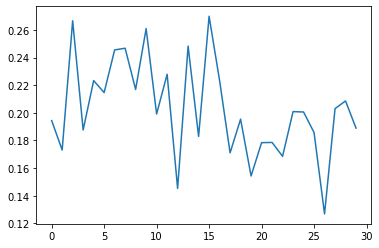

In [18]:
import matplotlib.pyplot as plt
plt.plot(losses)